In [1]:
#TITLE: Fresno Ag

#SUMMARY: The following code focuses on agriculture in one of California's most productive
#agricultural region, Fresno County. It uses crop mapping data from the California
#Department of Water Resources. The first year of data collection is 2014 and the latest year
#is 2019. It first focuses on California as a State before moving to Fresno County specifically. 
#if there are any questions or concerns, feel free to email Matt Woolf at mattcharleswoolf@gmail.com.

#Import necessary packages

#Allows for reading of geospatial data
import geopandas as gpd
#Allows for interesting visualizations
import matplotlib
#Allows for mathematical operations
import numpy as np
#Allows for plotting
import matplotlib.pyplot as plt
#Allows for creation of GIFs
import imageio

In [2]:
#Reading the 2014 data
df2014 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2014/i15_Crop_Mapping_2014.shx')

#Getting count of unique values
df2014['Crop2014'].value_counts()

Grapes                                       66151
Idle                                         34890
Almonds                                      32580
Citrus                                       27360
Mixed Pasture                                21516
Alfalfa and Alfalfa Mixtures                 19829
Walnuts                                      16332
Corn, Sorghum and Sudan                      15965
Miscellaneous Truck Crops                    14964
Avocados                                     10964
Rice                                          8662
Strawberries                                  7622
Peaches/Nectarines                            6842
Pistachios                                    5927
Tomatoes                                      5589
Plums, Prunes and Apricots                    5576
Miscellaneous Grasses                         5083
Miscellaneous Grain and Hay                   5057
Flowers, Nursery and Christmas Tree Farms     5023
Olives                         

In [3]:
#Reading/evaluating the 2019 data
df2019 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2019/i15_Crop_Mapping_2019.shx')

#Getting count of unique values
df2019['MAIN_CROP'].value_counts()

V      69681
D12    40875
X      36044
C      29296
P3     23122
D13    19155
G6     18916
C5     15173
P1     14960
F16    14844
R1      9946
T18     9841
T16     9557
D14     7960
YP      7622
T30     7532
D5      6929
P6      5547
T4      4799
C6      4666
T15     4480
P4      4295
D16     4106
T20     3978
F1      3884
G2      3784
D10     3646
T19     3190
D3      2952
T9      1759
U       1609
D1      1598
T27     1512
T31     1368
C4      1235
T10     1140
C7      1089
T6      1042
F12     1019
F10     1014
D15      870
D8       818
F2       795
T21      721
D6       715
F11      586
R2       491
C8       489
C10      321
T12      128
C3        10
D          4
P7         3
P          3
T17        2
C2         1
Name: MAIN_CROP, dtype: int64

In [4]:
#Clearly, the 2014 data is written in crop names (example: "Strawberries") whereas the 
#2019 data is written in crop codes (example: "C" for citrus). In order to standardize
#crop categories, we replace these codes with crop names.

df2019 = df2019.replace({
    'V': 'Grapes',
    'D12':'Almonds',
    'D13':'Walnuts',
    'G6':'Miscellaneous Grain and Hay',
    'C5':'Avocados',
    'P1':'Alfalfa and Alfalfa Mixtures',
    'R1':'Rice',
    'T16':'Flowers, Nursery and Christmas Tree Farms',
    'D14':'Pistachios',
    'D5':'Peaches/Nectarines',
    'P6':'Miscellaneous Grasses',
    'T4':'Cole Crops',
    'C6':'Olives',
    'T15':'Tomatoes',
    'T20':'Strawberries',
    'F1':'Cotton',
    'G2':'Wheat',
    'D10':'Miscellaneous Deciduous',
    'T19':'Bush Berries',
    'D3':'Cherries',
    'T9':'Melons, Squash and Cucumbers',
    'U':'Urban',
    'D1':'Apples',
    'T27':'Greenhouse',
    'C4':'Dates',
    'T10':'Onions and Garlic',
    'C7':'Miscellaneous Subtropical Fruits',
    'T6':'Carrots',
    'F12':'Sunflowers',
    'F10':'Beans (Dry)',
    'D15':'Pomegranates',
    'F2':'Safflower',
    'T21':'Peppers',
    'D6':'Pears',
    'R2':'Wild Rice',
    'C8':'Kiwis',
    'C':'Citrus',
    'C10':'Eucalyptus',
    'C2':'Lemons',
    'C3':'Oranges',
    'D':'Deciduous',
    'D16':'Plums, Prunes or Apricots',
    'D8':'Prunes',
    'F11':'Miscellaneous field',
    'F16':'Corn, Sorghum, or Sudan',
    'P':'Pasture',
    'P3':'Mixed pasture',
    'P4':'Native pasture',
    'P7':'Turf farms',
    'T12':'Potatoes',
    'T17':'Mixed (four or more)',
    'T18':'Miscellanous truck',
    'T30':'Lettuce or leafy greens',
    'T31':'Potato or sweet potato',
    'X':'Unclassified fallow',
    'YP':'Young Perrenial'
  }
)

#Examine the data after changes above
df2019.head()

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
0,1,1700436,*,Grapes,S,**,**,*,*,*,...,****,NRO,6.057928,Lake,V **** **** ****,Grapes,NaN,40625.643341,1005.431816,"POLYGON Z ((-13677596.411 4718918.436 0.000, -..."
1,2,1700437,*,Deciduous,S,**,**,*,*,*,...,****,NRO,7.200428,Lake,D6 **** **** ****,Pears,NaN,48402.091152,1082.039734,"POLYGON Z ((-13685944.649 4731044.473 0.000, -..."
2,3,1700438,*,Deciduous,S,**,**,*,*,*,...,****,NRO,3.705646,Lake,D6 **** **** ****,Pears,NaN,24872.248316,667.790272,"POLYGON Z ((-13678860.423 4723270.145 0.000, -..."
3,4,1700439,*,Grapes,S,**,**,*,*,*,...,****,NRO,25.352513,Lake,V **** **** ****,Grapes,NaN,169545.174831,1993.146307,"POLYGON Z ((-13653397.845 4704721.672 0.000, -..."
4,5,1700440,*,Deciduous,S,**,**,*,*,*,...,****,NRO,3.283275,Lake,D13 **** **** ****,Walnuts,NaN,22009.326366,649.634738,"POLYGON Z ((-13677863.892 4716620.397 0.000, -..."


In [5]:
#Create color list for plotting
colors = ['coral', 'red', 'blue',
         'orange', 'pink', 'yellow',
        'slategray', 'dodgerblue','olivedrab', 
         'steelblue', 'lawngreen','seashell',
         'gainsboro', 'darkseagreen','aquamarine',
         'lemonchiffon', 'wheat','tan', 
         'royalblue', 'hotpink','crimson', 
         'palegoldenrod', 'cyan','linen', 
         'sandybrown', 'greenyellow','peachpuff', 
         'chocolate', 'indianred','tomato', 
         'darkred', 'firebrick', 'indigo', 
         'thistle','salmon', 'cornsilk',
         'green','brown','black']

(-13902400.2784, -12648165.787, 3753449.1323849973, 5228482.210915003)

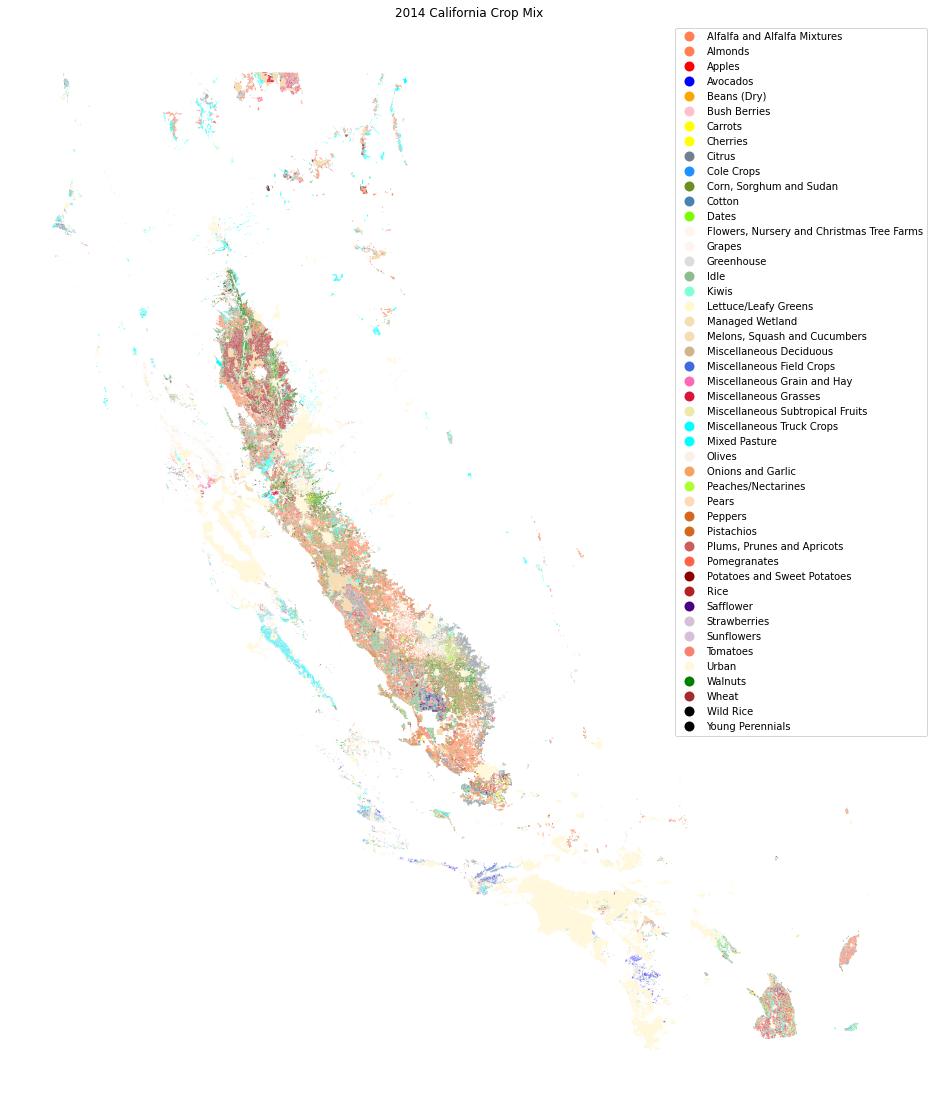

In [6]:
#Plot 2014 crop map using the colors in colors
df2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2014 California Crop Mix")
plt.axis('off')

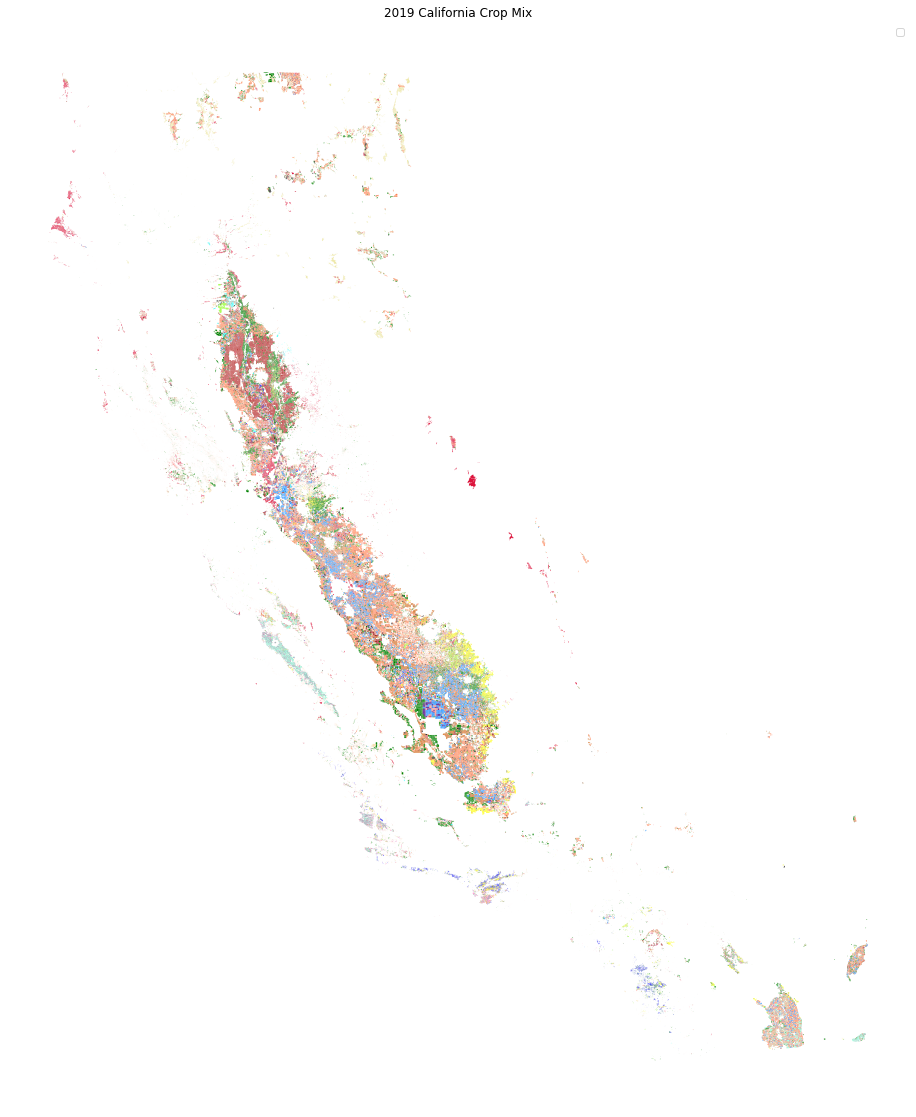

In [72]:
#Plot geopatial data using the colors in colors
df2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
           cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2019 California Crop Mix")
plt.axis('off')
plt.legend('off')
plt.savefig('/Users/MattWoolf/Desktop/california2019.png', dpi=100)

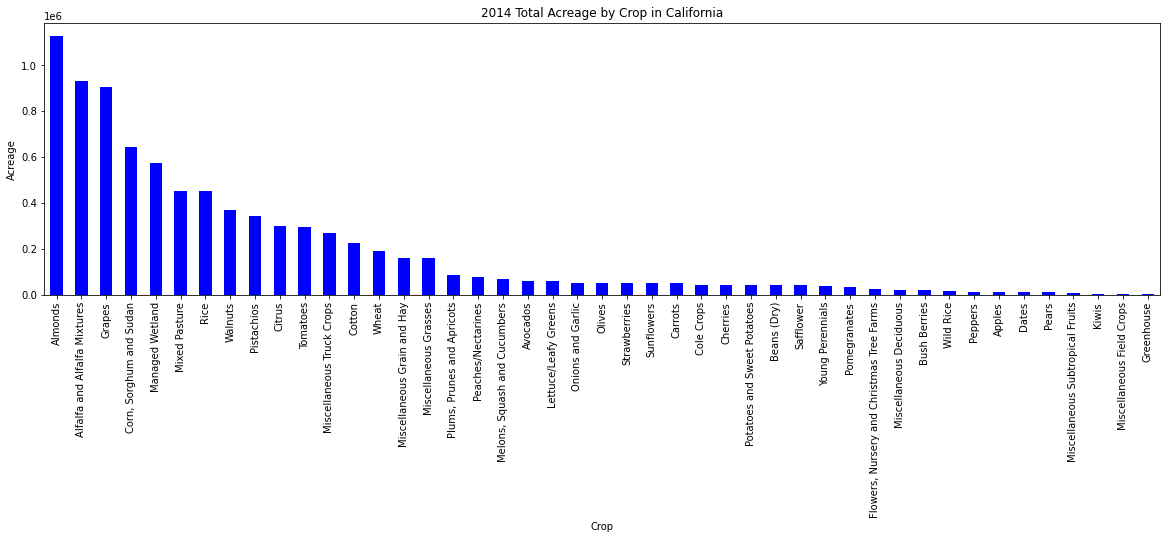

In [68]:
#Create bar charts for 2014 crops in descending order
crop_areas2014 = df2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_areas2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Total Acreage by Crop in California')
plt.ylabel('Acreage')
plt.xlabel('Crop')
plt.savefig('/Users/MattWoolf/Desktop/californiabar2019.png', dpi=100)

Text(0.5, 0, 'Crop')

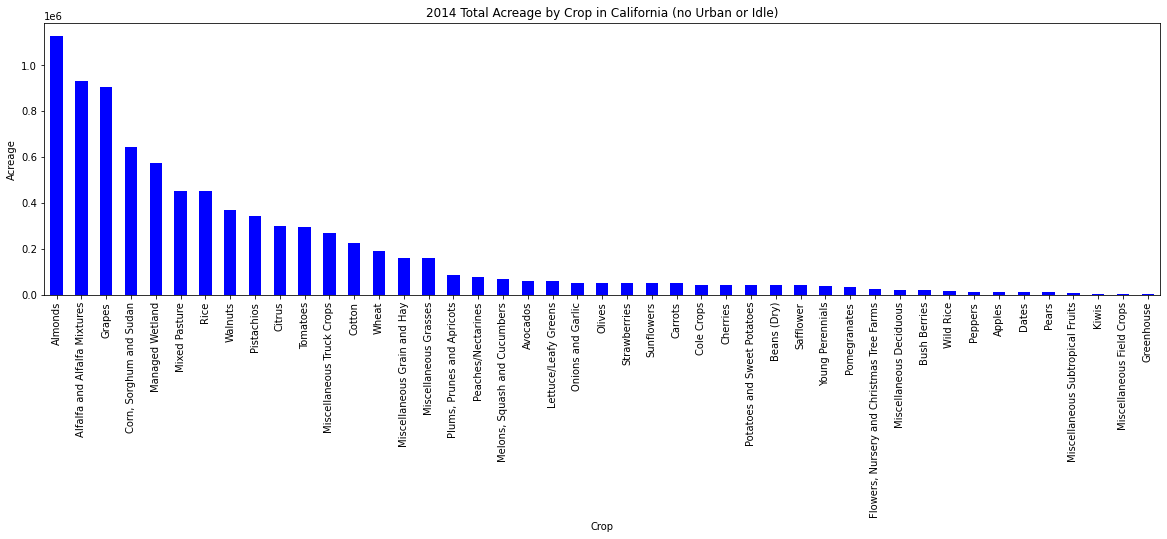

In [29]:
#Clearly, parcel use for 'Urban' is the largest in terms of acreage. Since we are 
#interested in crops rather than urban uses of land or idle areas, we drop 'Urban' and 'Idle'
df2014 = df2014[df2014.Crop2014 != 'Urban']
df2014 = df2014[df2014.Crop2014 != 'Idle']

#Create bar charts for 2014 crops in descending order without Urban category
crop_areas2014 = df2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_areas2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Total Acreage by Crop in California (no Urban or Idle)')
plt.ylabel('Acreage')
plt.xlabel('Crop')

Text(0.5, 0, 'Crop')

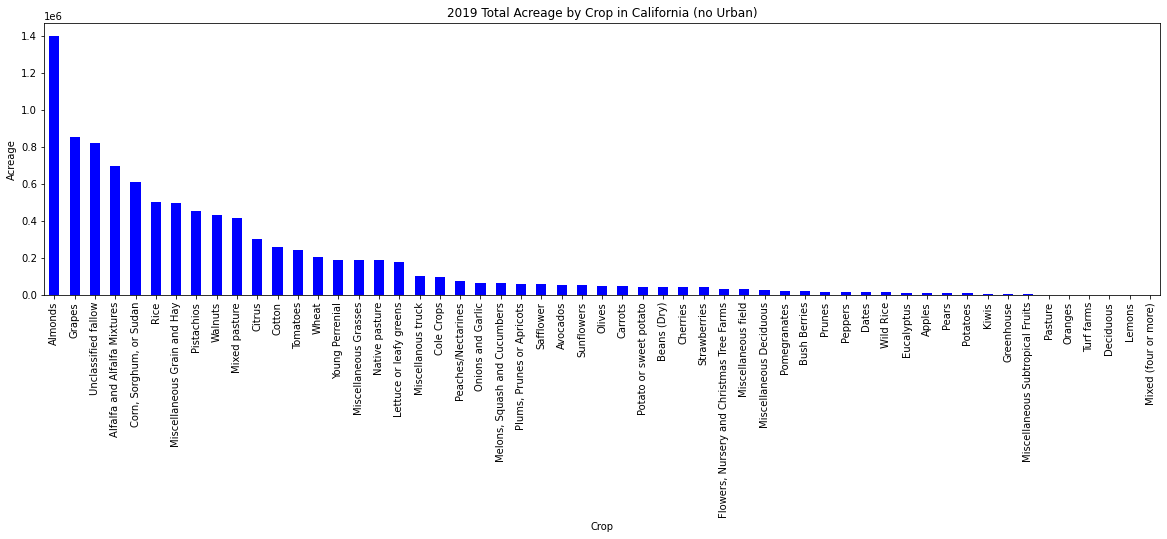

In [28]:
#We do the same for the 2019 data...

df2019 = df2019[df2019.MAIN_CROP != 'Urban']
crop_areas2019 = df2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2019 Total Acreage by Crop in California (no Urban)')
plt.ylabel('Acreage')
plt.xlabel('Crop')

In [11]:
#Though it is interested to examine the data at the state level, it can be overwhelming.
#Examining the data on the county level and even crop level can likely lead us to better 
#insights. We start by looking at 2014 crop data for only Fresno county.

df_fresno_2014=df2014[df2014.County == "Fresno"]
df_fresno_2014.head()

,OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,Shape__Are,Shape__Len,geometry
3,4,Grapes,43.474109,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,274749.750896,2256.858669,"POLYGON Z ((-13355020.096 4407864.075 0.000, -..."
7,8,Grapes,93.723265,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,588559.373632,3207.406009,"POLYGON Z ((-13331506.862 4374173.298 0.000, -..."
21,22,Peaches/Nectarines,6.409884,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,40303.875291,899.340263,"POLYGON Z ((-13304207.158 4380620.872 0.000, -..."
39,40,Grapes,17.461519,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,109801.912236,1746.082648,"POLYGON Z ((-13331417.480 4381217.468 0.000, -..."
55,56,Citrus,3.856694,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,C | CITRUS AND SUBTROPICAL,24328.354256,673.940435,"POLYGON Z ((-13286896.510 4397983.681 0.000, -..."


In [12]:
#And then we do the same for the 2019 data. 
df_fresno_2019=df2019[df2019.COUNTY == "Fresno"]
df_fresno_2019.head()

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
195238,195239,1027399,*,Deciduous,S,**,**,*,*,*,...,****,SCRO,22.061916,Fresno,D13 **** **** ****,Walnuts,NaN,139363.749540,1656.618808,"POLYGON Z ((-13433615.251 4405704.528 0.000, -..."
195239,195240,1027506,*,Deciduous,S,**,**,*,*,*,...,****,SCRO,8.826006,Fresno,D13 **** **** ****,Walnuts,NaN,55576.146852,943.239001,"POLYGON Z ((-13340790.818 4388246.261 0.000, -..."
195240,195241,1027510,*,Deciduous,S,**,**,*,*,*,...,****,SCRO,6.896737,Fresno,D13 **** **** ****,Walnuts,NaN,43568.828120,998.194492,"POLYGON Z ((-13434514.503 4406030.665 0.000, -..."
195241,195242,1027520,*,Deciduous,S,**,**,*,*,*,...,****,SCRO,2.098888,Fresno,D13 **** **** ****,Walnuts,NaN,13220.507666,666.714248,"POLYGON Z ((-13330637.180 4390016.899 0.000, -..."
195242,195243,1027487,*,Unclassified fallow,S,**,**,*,*,*,...,****,SCRO,3.071160,Fresno,X **** **** ****,Unclassified fallow,NaN,19399.984633,562.162752,"POLYGON Z ((-13341088.947 4405460.367 0.000, -..."


(-13453921.799365003, -13268638.438135, 4297233.261234996, 4458308.1590650035)

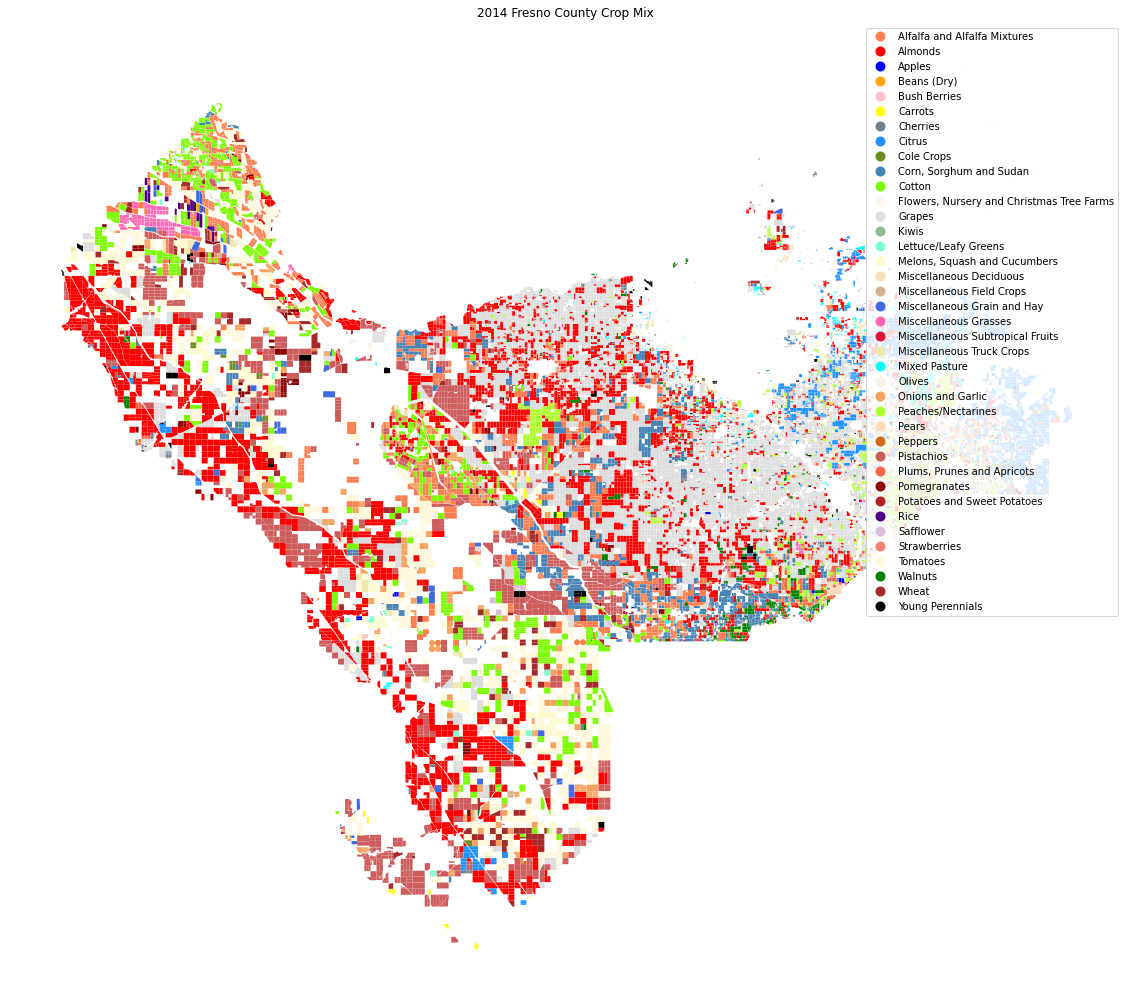

In [13]:
#Plot 2014 crop map for Fresno County
df_fresno_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2014 Fresno County Crop Mix")
plt.axis('off')

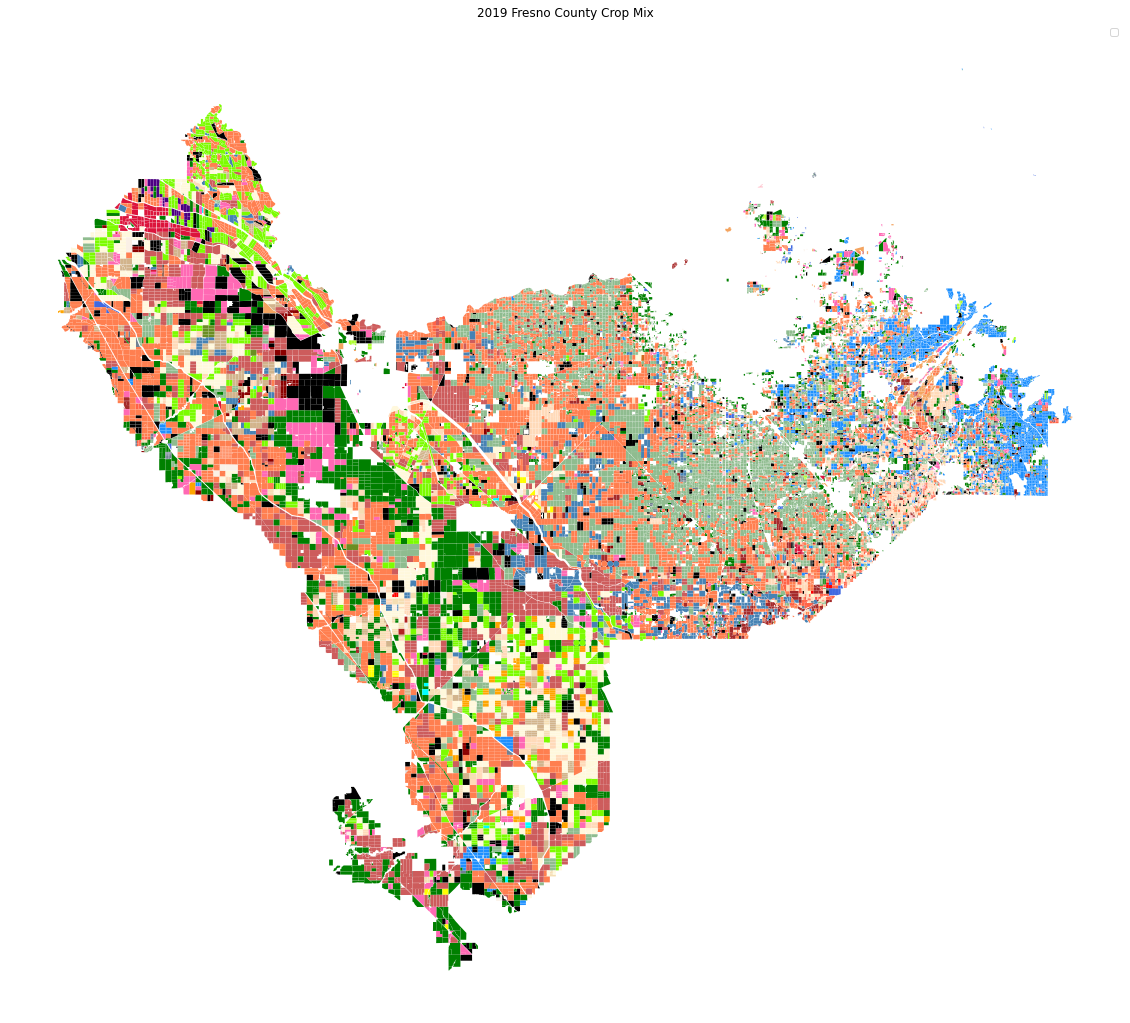

In [71]:
#Plot 2019 crop map for Fresno County
df_fresno_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2019 Fresno County Crop Mix")
plt.axis('off')
plt.legend('off')
plt.savefig('/Users/MattWoolf/Desktop/fresno2019.png', dpi=100)

Text(0.5, 0, 'Crop')

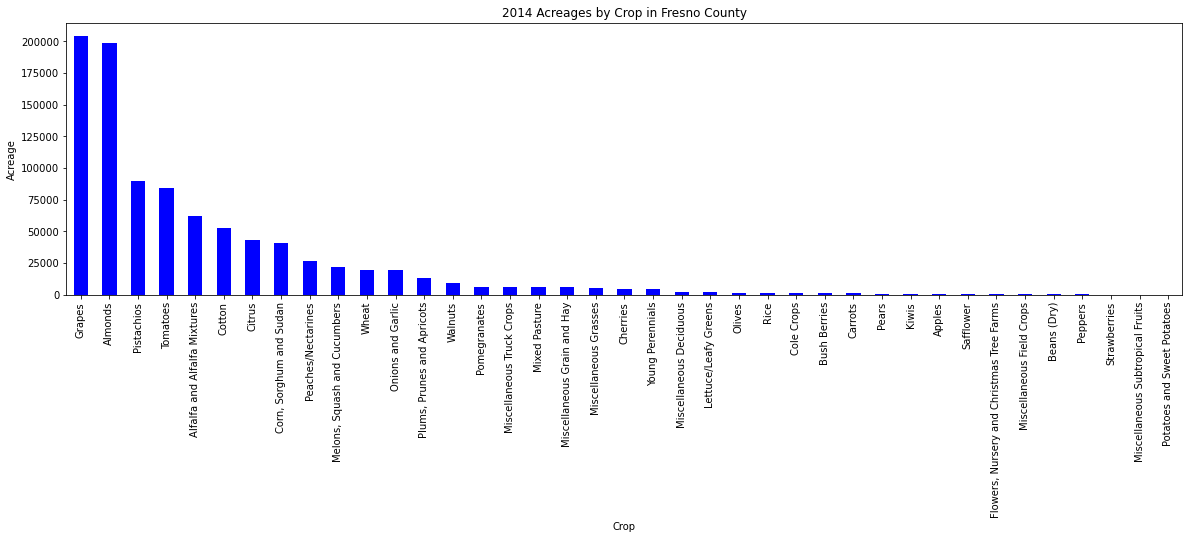

In [20]:
#Create 2014 barchart for Fresno County
crop_acreage_fresno_2014 = df_fresno_2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_acreage_fresno_2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Acreages by Crop in Fresno County')
plt.ylabel('Acreage')
plt.xlabel('Crop')

Text(0.5, 0, 'Crop')

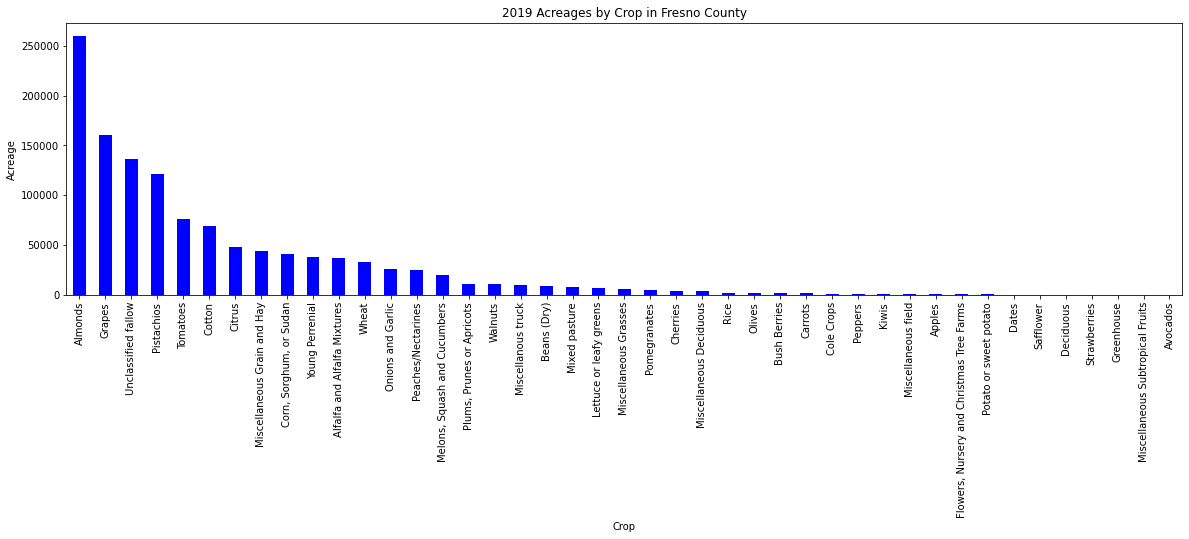

In [21]:
#Create 2019 barchart for Fresno County
crop_acreage_fresno_2019 = df_fresno_2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_acreage_fresno_2019.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2019 Acreages by Crop in Fresno County')
plt.ylabel('Acreage')
plt.xlabel('Crop')

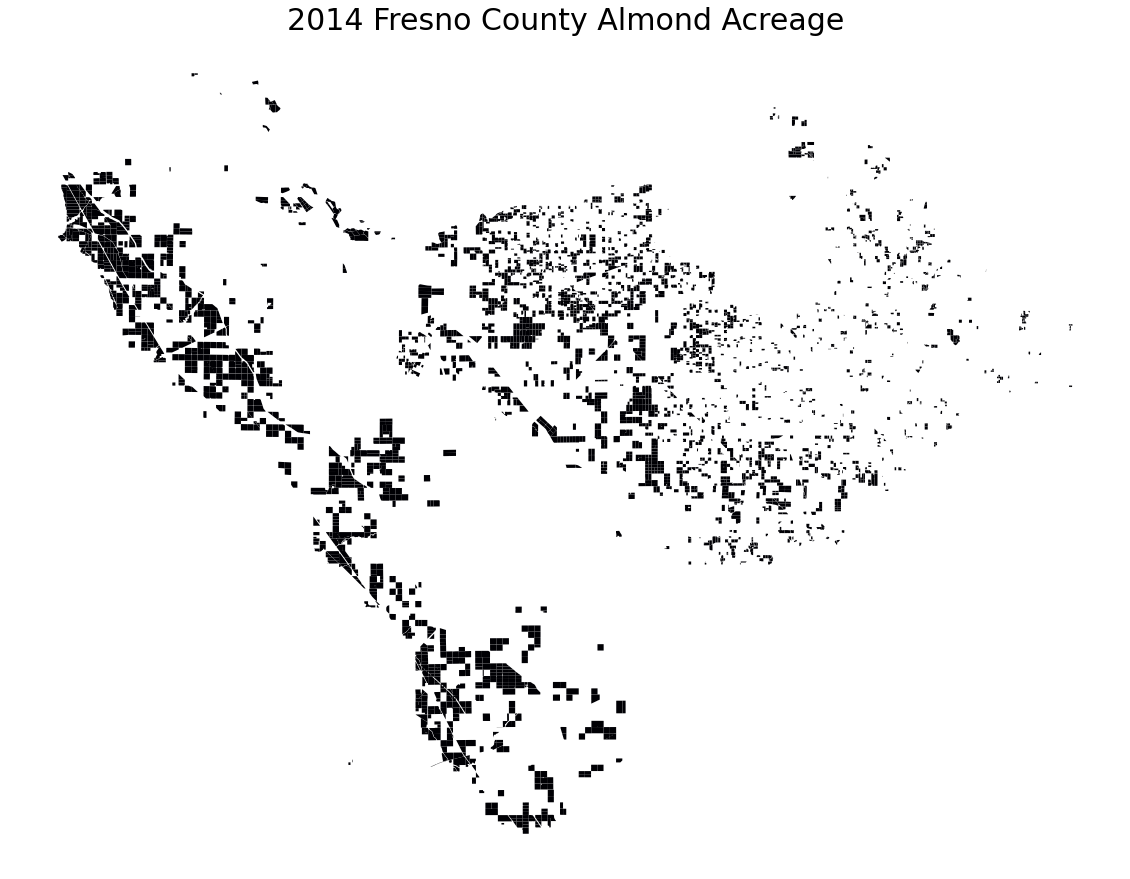

In [64]:
#We can even get more specific by focusing on specific crops. The top crops in Fresno County
# as of 2022 are (in descending order) almonds, grapes, tomatoes, cotton. We first focus on
# almonds in 2014 in Fresno County. We save the image as a PNG so we can also create a GIF.
df_fresno_2014_almonds=df_fresno_2014[df_fresno_2014.Crop2014 == "Almonds"]
df_fresno_2014_almonds.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20), 
                   cmap='magma')
plt.title("2014 Fresno County Almond Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/almonds2014.png', dpi=100)

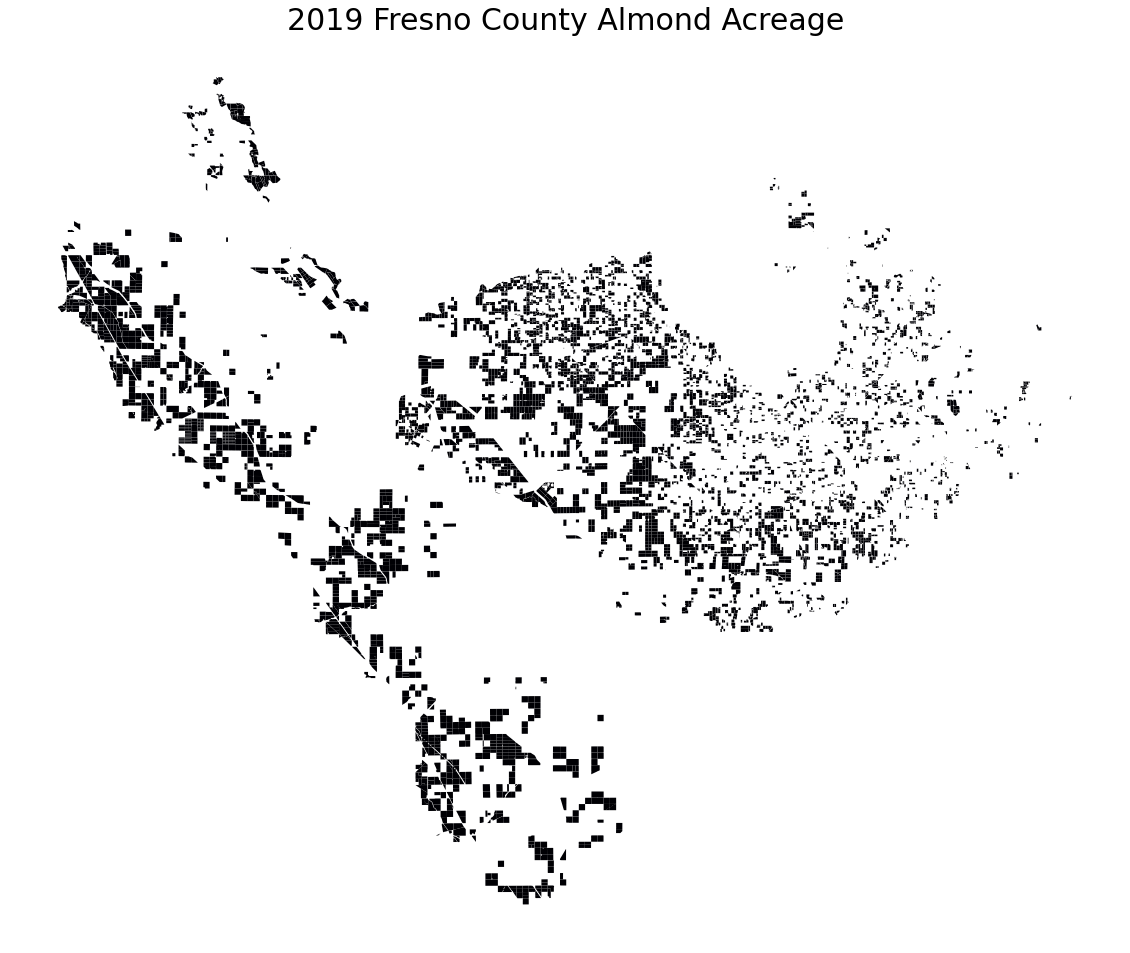

In [65]:
#We do the same for almonds in 2019 in Fresno County
df_fresno_2019_almonds=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Almonds"]
df_fresno_2019_almonds.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='magma')
plt.title("2019 Fresno County Almond Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/almonds2019.png', dpi=100)

In [66]:
#Create GIF for almonds...
png_list = ['/Users/MattWoolf/Desktop/almonds2014.png', 
            '/Users/MattWoolf/Desktop/almonds2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/almonds.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

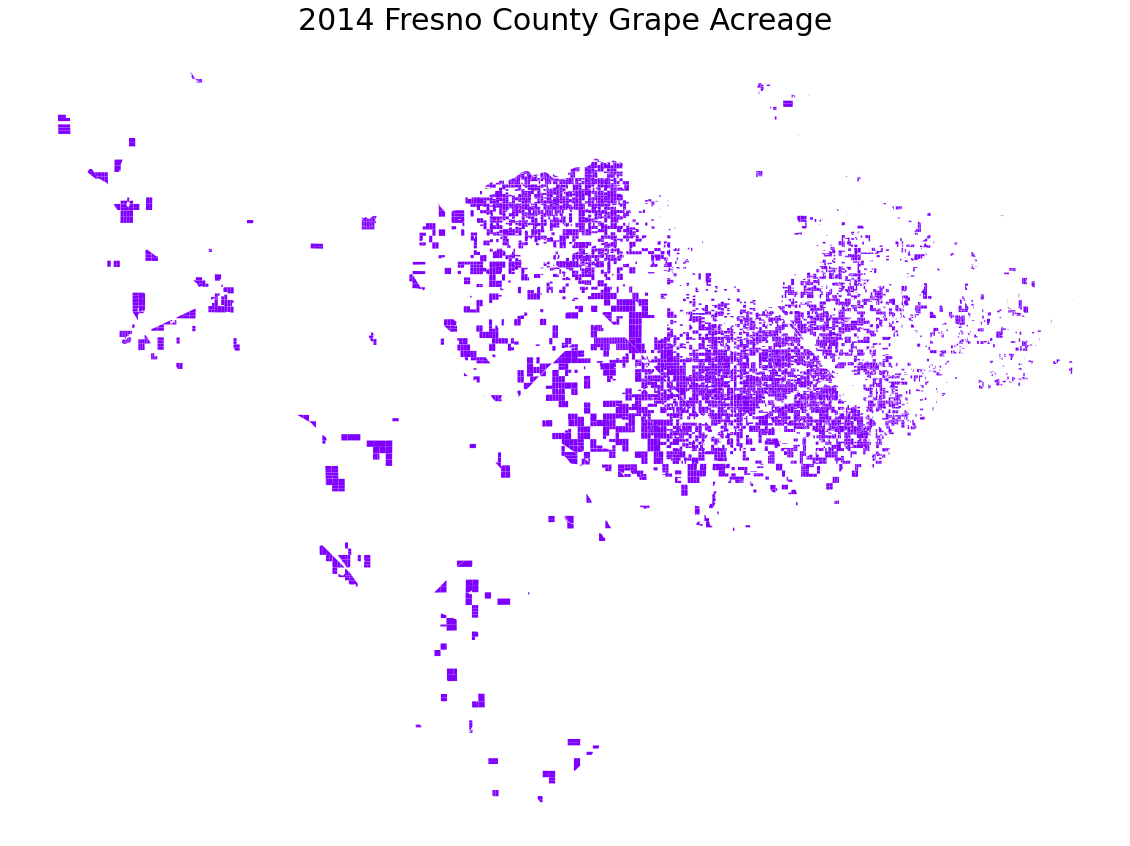

In [73]:
#Plotting 2014 grapes in Fresno County
df_fresno_2014_grapes=df_fresno_2014[df_fresno_2014.Crop2014 == "Grapes"]
df_fresno_2014_grapes.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20),
                           cmap='rainbow')
plt.title("2014 Fresno County Grape Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/grapes2014.png', dpi=100)

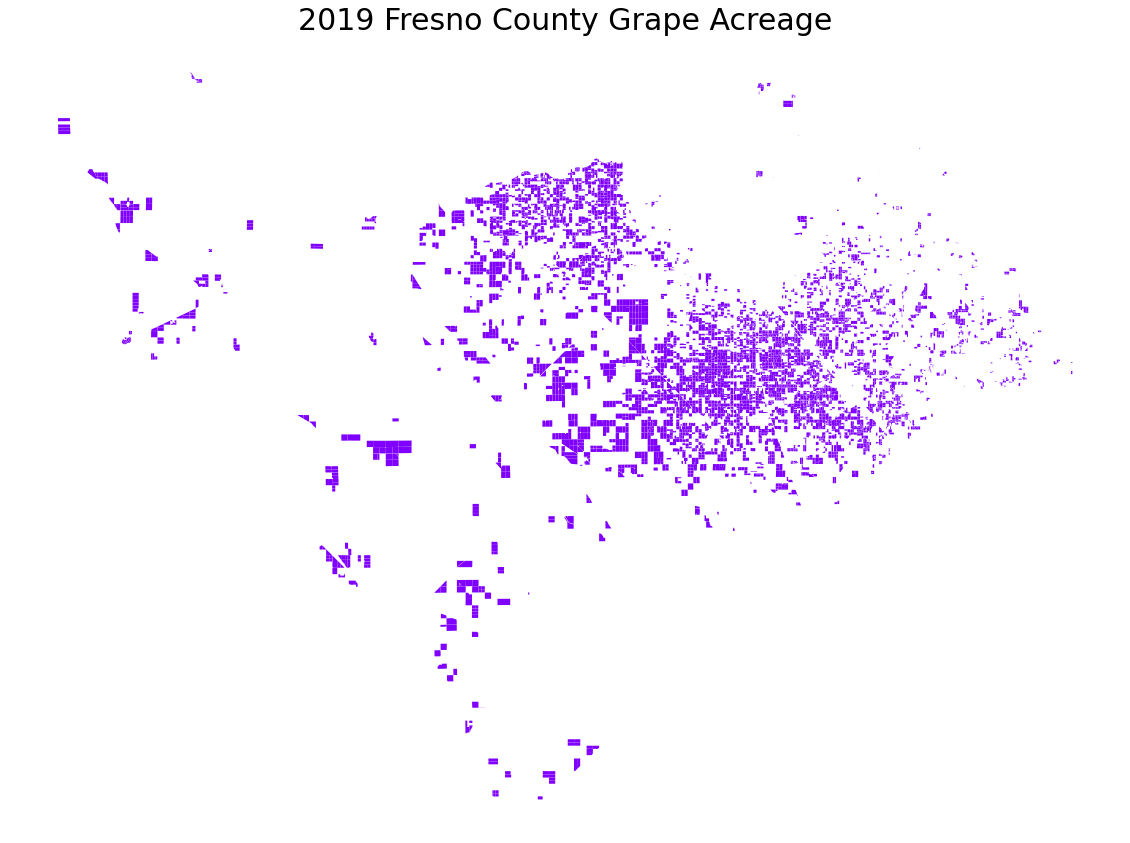

In [74]:
#Plotting 2019 grapes in Fresno County
df_fresno_2019_grapes=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Grapes"]
df_fresno_2019_grapes.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='rainbow')
plt.title("2019 Fresno County Grape Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/grapes2019.png', dpi=100)

In [75]:
#Create GIF for grapes...
png_list = ['/Users/MattWoolf/Desktop/grapes2014.png', 
            '/Users/MattWoolf/Desktop/grapes2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/grapes.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

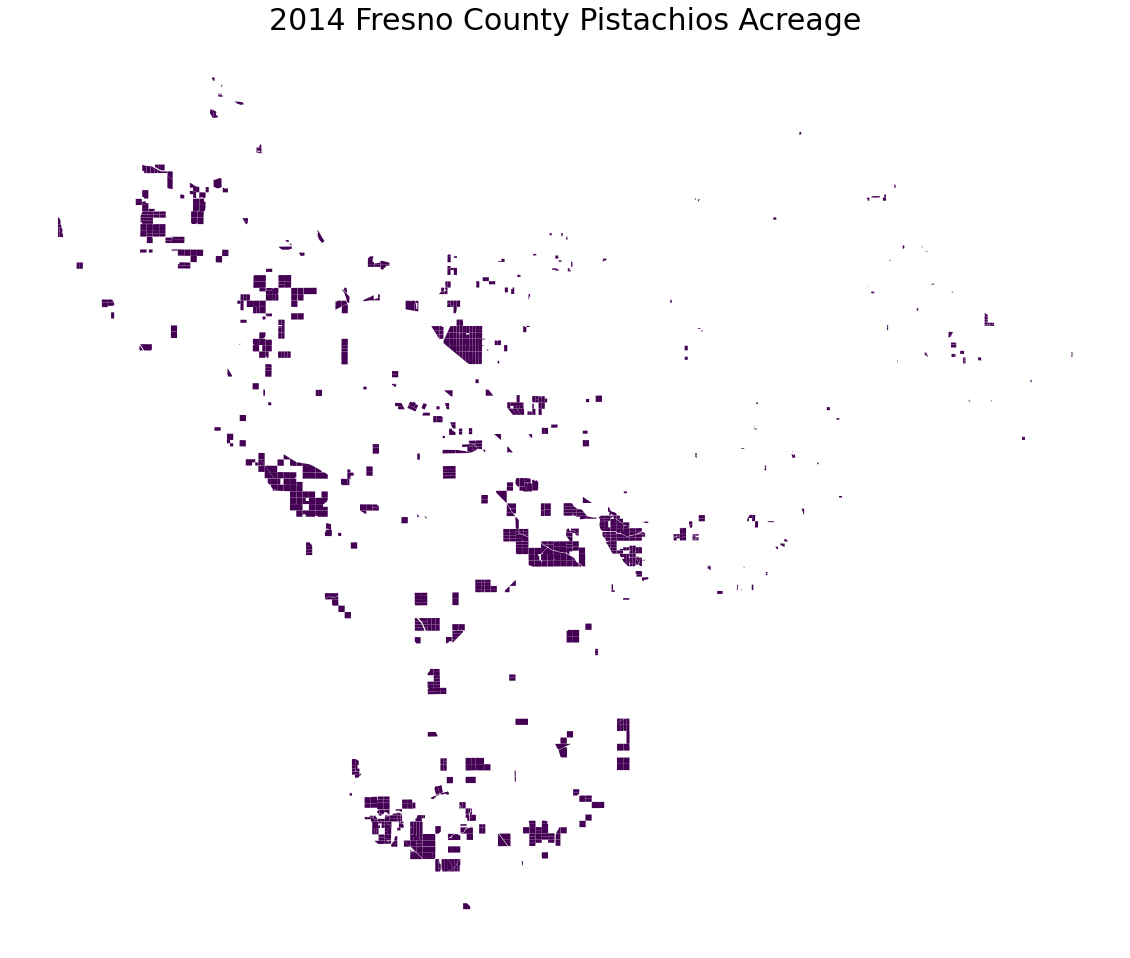

In [79]:
#Plotting 2014 grapes in Fresno County
df_fresno_2014_pistachios=df_fresno_2014[df_fresno_2014.Crop2014 == "Pistachios"]
df_fresno_2014_pistachios.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20),
                           cmap='viridis')
plt.title("2014 Fresno County Pistachios Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/pistachios2014.png', dpi=100)

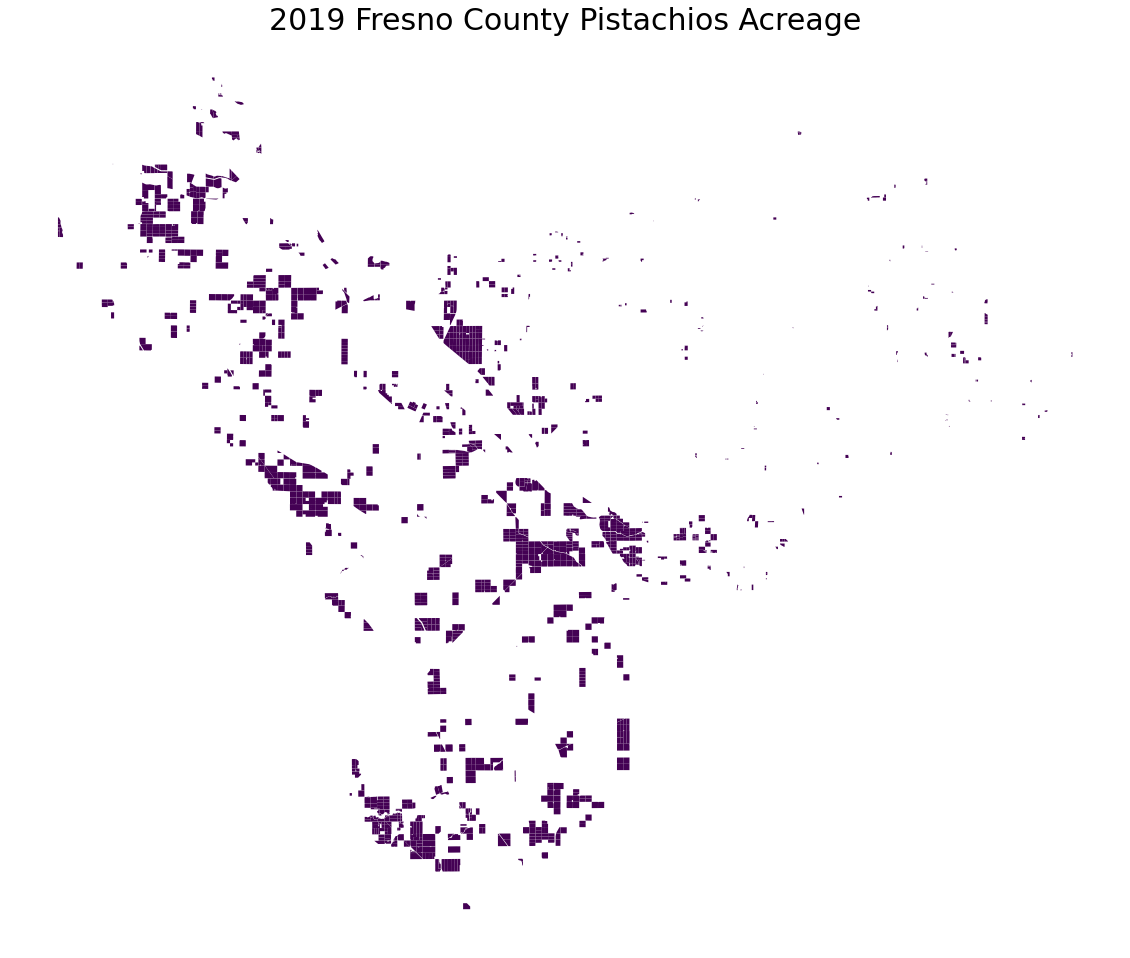

In [80]:
#Plotting 2019 grapes in Fresno County
df_fresno_2019_pistachios=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Pistachios"]
df_fresno_2019_pistachios.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='viridis')
plt.title("2019 Fresno County Pistachios Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/pistachios2019.png', dpi=100)

In [81]:
#Create GIF for pistachios...
png_list = ['/Users/MattWoolf/Desktop/pistachios2014.png', 
            '/Users/MattWoolf/Desktop/pistachios2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/pistachios.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

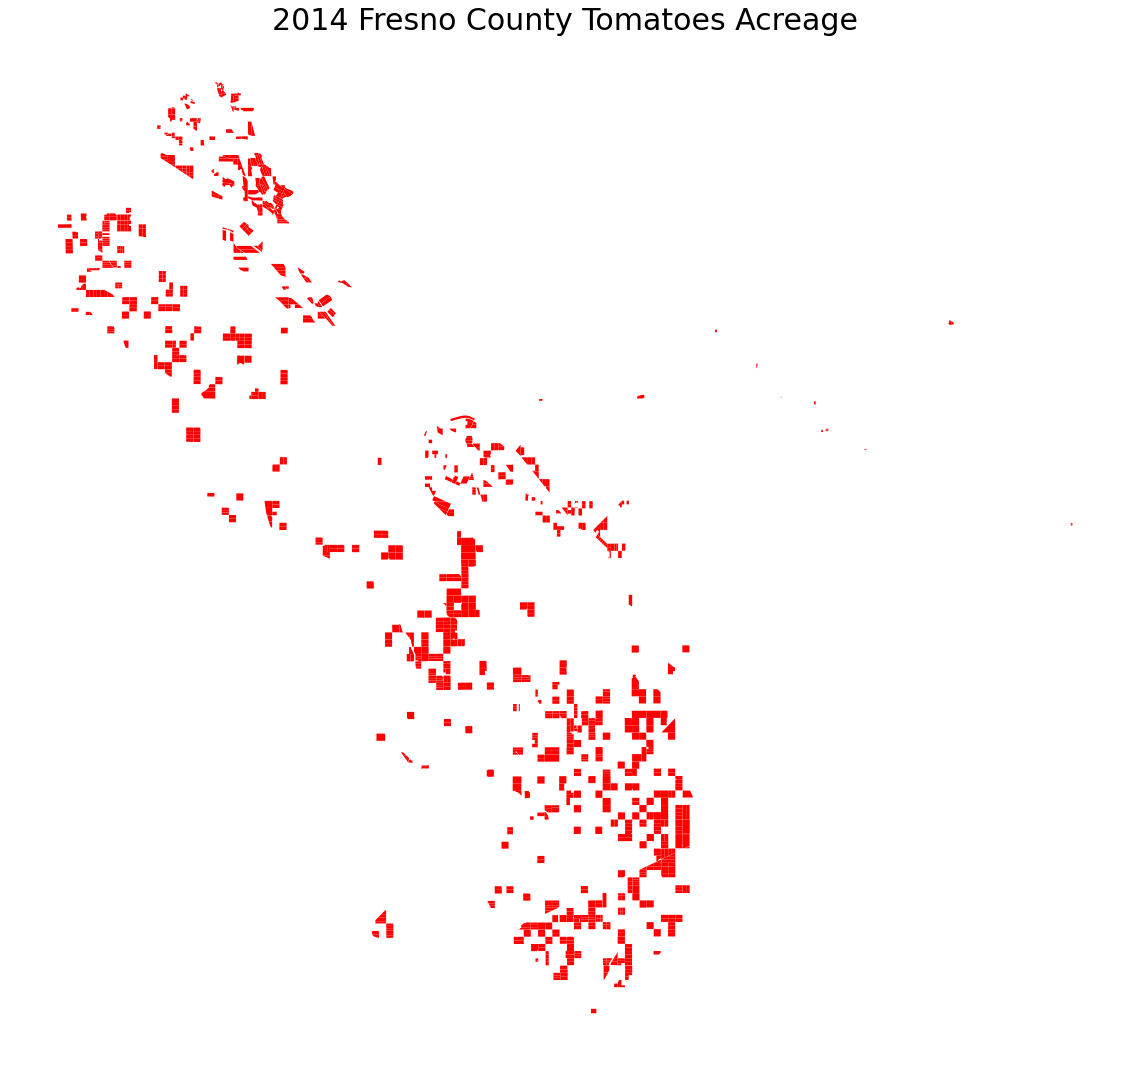

In [82]:
#Plotting 2014 tomatoes in Fresno County
df_fresno_2014_tomatoes=df_fresno_2014[df_fresno_2014.Crop2014 == "Tomatoes"]

df_fresno_2014_tomatoes.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20),
                           cmap='hsv')
plt.title("2014 Fresno County Tomatoes Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/tomatoes2014.png', dpi=100)

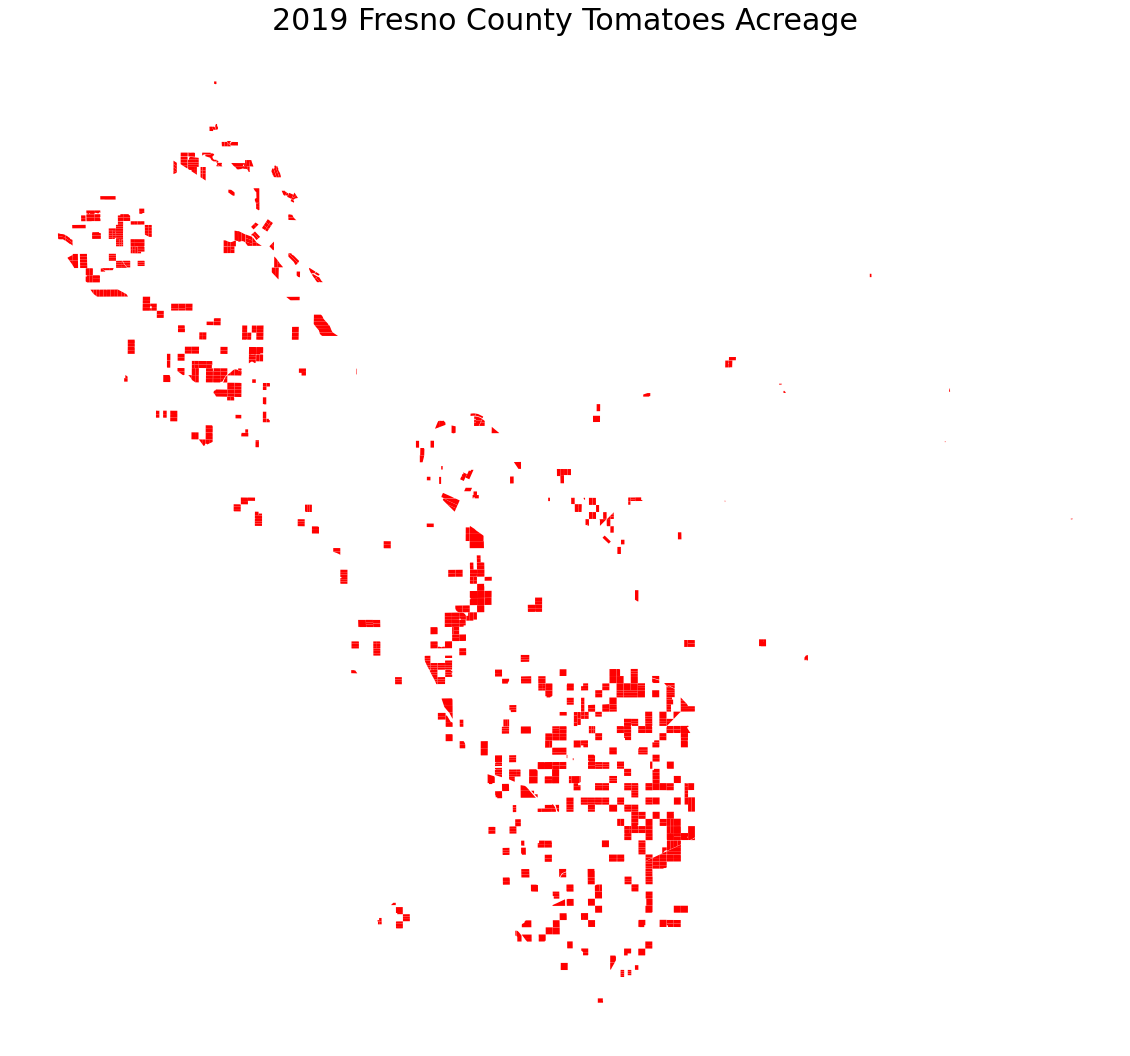

In [83]:
#Plotting 2019 tomatoes in Fresno County
df_fresno_2019_tomatoes=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Tomatoes"]
df_fresno_2019_tomatoes.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='hsv')
plt.title("2019 Fresno County Tomatoes Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/tomatoes2019.png', dpi=100)

In [84]:
#Create GIF for tomatoes...
png_list = ['/Users/MattWoolf/Desktop/tomatoes2014.png', 
            '/Users/MattWoolf/Desktop/tomatoes2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/tomatoes.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

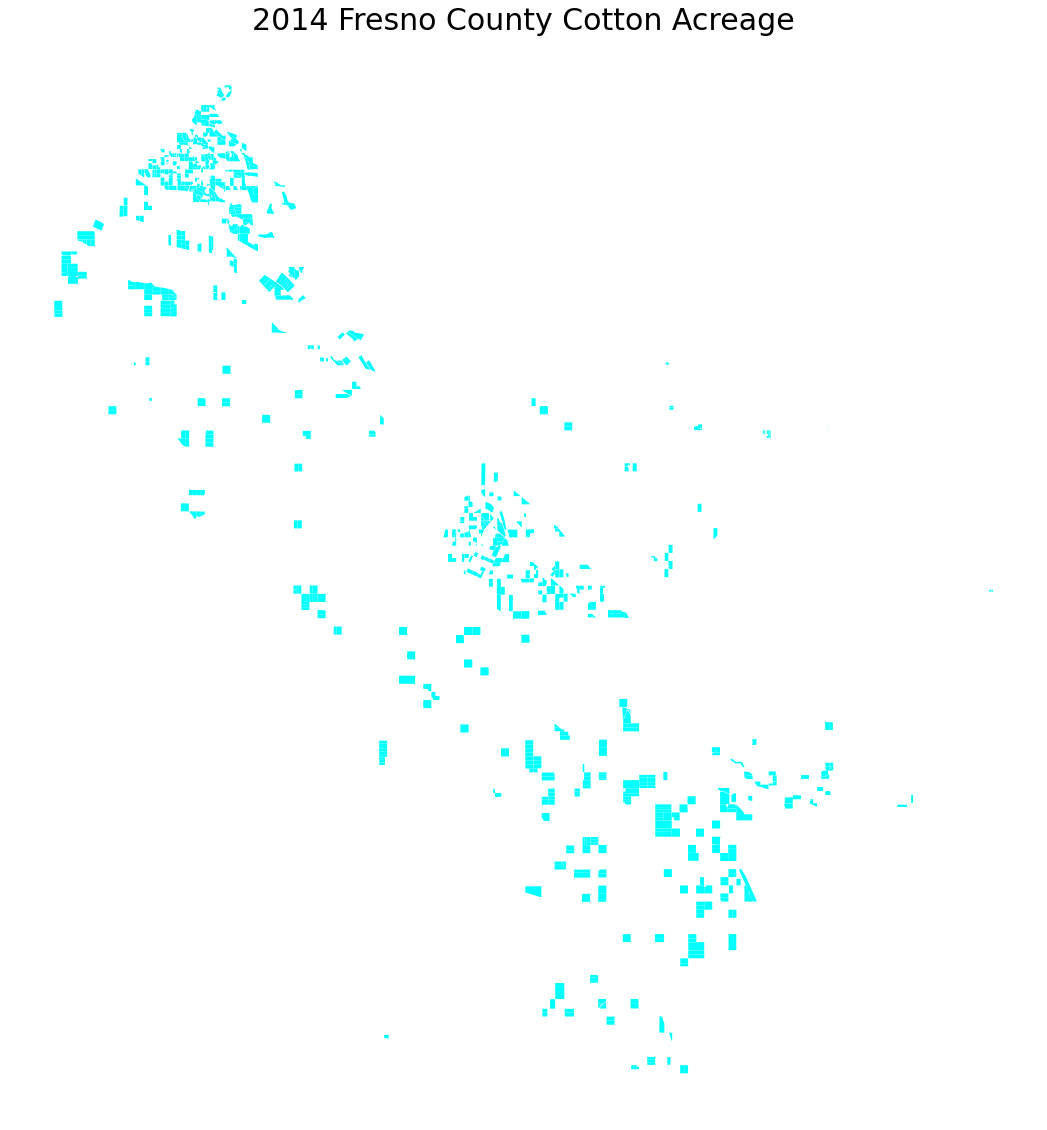

In [85]:
#Plotting 2014 cotton in Fresno County
df_fresno_2014_cotton=df_fresno_2014[df_fresno_2014.Crop2014 == "Cotton"]
df_fresno_2014_cotton.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20),
                           cmap='cool')
plt.title("2014 Fresno County Cotton Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/cotton2014.png', dpi=100)

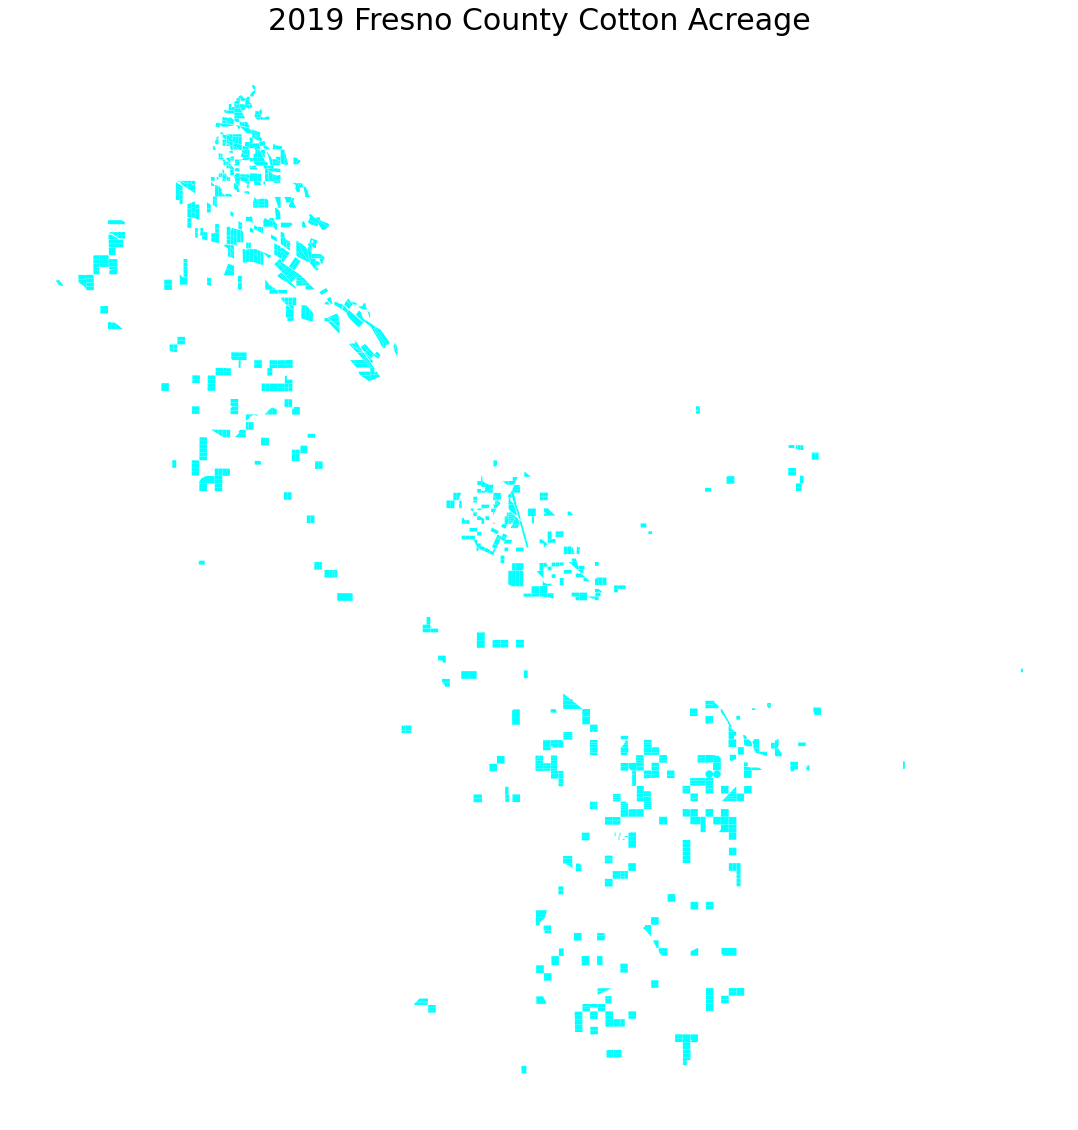

In [86]:
#Plotting 2019 cotton in Fresno County
df_fresno_2019_cotton=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Cotton"]
df_fresno_2019_cotton.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='cool')
plt.title("2019 Fresno County Cotton Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/cotton2019.png', dpi=100)

In [87]:
#Create GIF for cotton...
png_list = ['/Users/MattWoolf/Desktop/cotton2014.png', 
            '/Users/MattWoolf/Desktop/cotton2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/cotton.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)